# Controlling the overlap of first-layer weights in 2LNN in the meanfield regime

## Nov 2020

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import numpy.random as rnd

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc("font", **{"size": 14})
plt.rc("lines", linewidth=2.0)
mpl.rcParams['lines.markersize'] = 12
mpl.rcParams['lines.markeredgewidth'] = 2

We propose a measure for the overlap of the first layer weights of two-layer neural nets $\phi_\theta: \mathbb{R}^N \to \mathbb{R}$ in the meanfield regime:
\begin{equation}
  \phi_\theta(x) = \frac{1}{K} \sum_k^K v^k g(w^k x)
\end{equation}
where $\theta$ denotes all the trainable parameters of the model.

We first draw a weight matrix for the first teacher $W_1=(w_1^k)\in\mathbb{R}^{N\times K}$ element-wise i.i.d. from the normal distribution and orthonormalise it. The first-layer weights for the second teacher $W_2$ are obtained from
\begin{equation}
  W_2 = \alpha W_1 + (1 - \alpha) Z
\end{equation}
where $Z$ is another matrix with i.i.d. Gaussian elements and $0<\alpha<1$ is an interpolation parameter. We now compute the overlap of the two weight matrices for different values of $\alpha$.

In [4]:
N = 15  # input dimension
K = 1000  # num of neurons in the hidden layer

In [5]:
alphas = np.linspace(0, 1)  # interpolation parameter

We will calculate the mean and standard deviation of two overlap matrices:
\begin{equation}
  \frac{W W^\top}{K} \qquad \mathrm{and}\qquad \frac{W^\top W}{N}
\end{equation}

In [6]:
means = {"wwT": [None] * len(alphas), "wTw": [None] * len(alphas)}
stds = {"wwT": [None] * len(alphas), "wTw": [None] * len(alphas)}

In [ ]:
for idx, alpha in enumerate(alphas):
    ws = [rnd.randn(N, K), None]  # first layer of weights

    # orthonormalise the weights of the first teacher; 
    # this reduces the fluctuations in the overlap measured below
    import pdb; pdb.set_trace()
    overlap = ws[0] @ ws[0].T / K
    L = np.linalg.cholesky(overlap)
    ws[0] = np.linalg.inv(L) @ ws[0]
    
    import pdb; pdb.set_trace()

    # Compute the first-layer weights of the second teacher
    ws[1] = alpha * ws[0]  + (1 - alpha) * rnd.randn(*ws[0].shape)

    # calculate diagonal elements of overlaps
    overlaps = {"wwT": np.diag(ws[0] @ ws[1].T / K),
                "wTw": np.diag(ws[0].T @ ws[1] / N)}
    for key in ["wwT", "wTw"]:
        means[key][idx] = np.mean(overlaps[key])
        stds[key][idx] =  np.std(overlaps[key])

> <ipython-input-14-392986fe2a65>(7)<module>()
      5     # this reduces the fluctuations in the overlap measured below
      6     import pdb; pdb.set_trace()
----> 7     overlap = ws[0] @ ws[0].T / K
      8     L = np.linalg.cholesky(overlap)
      9     ws[0] = np.linalg.inv(L) @ ws[0]



ipdb>  overlap.shape


(15, 15)


ipdb>  n


> <ipython-input-14-392986fe2a65>(8)<module>()
      6     import pdb; pdb.set_trace()
      7     overlap = ws[0] @ ws[0].T / K
----> 8     L = np.linalg.cholesky(overlap)
      9     ws[0] = np.linalg.inv(L) @ ws[0]
     10 



ipdb>  n


> <ipython-input-14-392986fe2a65>(9)<module>()
      7     overlap = ws[0] @ ws[0].T / K
      8     L = np.linalg.cholesky(overlap)
----> 9     ws[0] = np.linalg.inv(L) @ ws[0]
     10 
     11     # Compute the first-layer weights of the second teacher



ipdb>  n


> <ipython-input-14-392986fe2a65>(12)<module>()
     10 
     11     # Compute the first-layer weights of the second teacher
---> 12     ws[1] = alpha * ws[0]  + (1 - alpha) * rnd.randn(*ws[0].shape)
     13 
     14     # calculate diagonal elements of overlaps



ipdb>  we[0]


*** NameError: name 'we' is not defined


ipdb>  ws[0]


array([[ 0.98429131, -2.67154787, -0.24771118, ..., -1.68002211,
         0.81149517,  0.96944716],
       [ 1.41339722, -0.29548129,  0.92572614, ..., -0.20880481,
        -0.87499458, -1.7516088 ],
       [-1.2827928 , -1.35265813, -1.07746497, ...,  1.13630705,
        -1.88459379, -0.37835771],
       ...,
       [-0.41824515,  1.63803122,  0.86109333, ..., -0.81629009,
         0.50190841,  0.86265532],
       [ 0.81372469,  0.54548931, -0.28754634, ...,  0.61628861,
        -1.47490567, -0.59947689],
       [ 0.0220776 , -0.33616221,  0.7050174 , ...,  0.19256498,
        -0.20096568,  0.06318821]])


ipdb>  ws[0].shape


(15, 1000)


ipdb>  ws[0][0]


array([ 9.84291314e-01, -2.67154787e+00, -2.47711178e-01, -1.02029636e+00,
       -1.65410677e-01, -3.89257516e-01, -1.43501747e-01, -1.36789983e-02,
        1.11712103e+00,  3.73601046e-01, -2.39889307e-01, -9.41772074e-01,
       -2.72733437e+00,  1.90295545e+00,  7.78069913e-01,  6.15355372e-01,
        5.02227079e-01,  5.95148220e-01, -6.74557003e-01, -1.67540061e+00,
       -3.88751246e-01,  7.25295361e-01, -1.56139492e+00, -1.74060487e+00,
        4.27186242e-01, -3.91127127e-01, -2.70114437e-01, -1.03652805e-01,
        1.28952992e-01, -3.57169044e-01, -1.07204561e+00,  2.08143021e+00,
        5.44215711e-01, -3.68947001e-01,  9.92032509e-01,  4.65406769e-01,
        1.11568972e+00, -8.01249721e-02, -1.39841164e+00,  1.15093542e-01,
        1.50016540e+00,  1.00177466e+00,  1.05624218e-02,  5.71041762e-01,
       -1.19683936e+00,  1.19632552e+00,  9.66264547e-01,  1.25781920e+00,
        5.39271060e-01,  2.59142814e-01,  2.25129475e-01, -4.19216543e-01,
       -3.26935662e-01, -

ipdb>  sum(ws[0][0])


-21.479860284119574


ipdb>  sum(ws[:, 0])


*** TypeError: list indices must be integers or slices, not tuple


ipdb>  ws[0][0]


array([ 9.84291314e-01, -2.67154787e+00, -2.47711178e-01, -1.02029636e+00,
       -1.65410677e-01, -3.89257516e-01, -1.43501747e-01, -1.36789983e-02,
        1.11712103e+00,  3.73601046e-01, -2.39889307e-01, -9.41772074e-01,
       -2.72733437e+00,  1.90295545e+00,  7.78069913e-01,  6.15355372e-01,
        5.02227079e-01,  5.95148220e-01, -6.74557003e-01, -1.67540061e+00,
       -3.88751246e-01,  7.25295361e-01, -1.56139492e+00, -1.74060487e+00,
        4.27186242e-01, -3.91127127e-01, -2.70114437e-01, -1.03652805e-01,
        1.28952992e-01, -3.57169044e-01, -1.07204561e+00,  2.08143021e+00,
        5.44215711e-01, -3.68947001e-01,  9.92032509e-01,  4.65406769e-01,
        1.11568972e+00, -8.01249721e-02, -1.39841164e+00,  1.15093542e-01,
        1.50016540e+00,  1.00177466e+00,  1.05624218e-02,  5.71041762e-01,
       -1.19683936e+00,  1.19632552e+00,  9.66264547e-01,  1.25781920e+00,
        5.39271060e-01,  2.59142814e-01,  2.25129475e-01, -4.19216543e-01,
       -3.26935662e-01, -

ipdb>  ws[0][:, 0]


array([ 0.98429131,  1.41339722, -1.2827928 , -0.01663013,  0.09914473,
        0.81230053, -0.95214137, -0.27462135,  0.10819478,  0.04855695,
       -0.28010791, -1.28745879, -0.41824515,  0.81372469,  0.0220776 ])


ipdb>  sum(ws[0][:, 0] ** 2)


8.851645718160007


ipdb>  ortho = ws[0]
ipdb>  ortho[0]


array([ 9.84291314e-01, -2.67154787e+00, -2.47711178e-01, -1.02029636e+00,
       -1.65410677e-01, -3.89257516e-01, -1.43501747e-01, -1.36789983e-02,
        1.11712103e+00,  3.73601046e-01, -2.39889307e-01, -9.41772074e-01,
       -2.72733437e+00,  1.90295545e+00,  7.78069913e-01,  6.15355372e-01,
        5.02227079e-01,  5.95148220e-01, -6.74557003e-01, -1.67540061e+00,
       -3.88751246e-01,  7.25295361e-01, -1.56139492e+00, -1.74060487e+00,
        4.27186242e-01, -3.91127127e-01, -2.70114437e-01, -1.03652805e-01,
        1.28952992e-01, -3.57169044e-01, -1.07204561e+00,  2.08143021e+00,
        5.44215711e-01, -3.68947001e-01,  9.92032509e-01,  4.65406769e-01,
        1.11568972e+00, -8.01249721e-02, -1.39841164e+00,  1.15093542e-01,
        1.50016540e+00,  1.00177466e+00,  1.05624218e-02,  5.71041762e-01,
       -1.19683936e+00,  1.19632552e+00,  9.66264547e-01,  1.25781920e+00,
        5.39271060e-01,  2.59142814e-01,  2.25129475e-01, -4.19216543e-01,
       -3.26935662e-01, -

ipdb>  


array([ 9.84291314e-01, -2.67154787e+00, -2.47711178e-01, -1.02029636e+00,
       -1.65410677e-01, -3.89257516e-01, -1.43501747e-01, -1.36789983e-02,
        1.11712103e+00,  3.73601046e-01, -2.39889307e-01, -9.41772074e-01,
       -2.72733437e+00,  1.90295545e+00,  7.78069913e-01,  6.15355372e-01,
        5.02227079e-01,  5.95148220e-01, -6.74557003e-01, -1.67540061e+00,
       -3.88751246e-01,  7.25295361e-01, -1.56139492e+00, -1.74060487e+00,
        4.27186242e-01, -3.91127127e-01, -2.70114437e-01, -1.03652805e-01,
        1.28952992e-01, -3.57169044e-01, -1.07204561e+00,  2.08143021e+00,
        5.44215711e-01, -3.68947001e-01,  9.92032509e-01,  4.65406769e-01,
        1.11568972e+00, -8.01249721e-02, -1.39841164e+00,  1.15093542e-01,
        1.50016540e+00,  1.00177466e+00,  1.05624218e-02,  5.71041762e-01,
       -1.19683936e+00,  1.19632552e+00,  9.66264547e-01,  1.25781920e+00,
        5.39271060e-01,  2.59142814e-01,  2.25129475e-01, -4.19216543e-01,
       -3.26935662e-01, -

ipdb>  np.sqrt(ortho[:, 0] ** 2)


array([0.98429131, 1.41339722, 1.2827928 , 0.01663013, 0.09914473,
       0.81230053, 0.95214137, 0.27462135, 0.10819478, 0.04855695,
       0.28010791, 1.28745879, 0.41824515, 0.81372469, 0.0220776 ])


ipdb>  np.sqrt(sum(ortho[:, 0]) ** 2)


0.21030968135506517


ipdb>  np.sqrt(sum(ortho[0]) ** 2)


21.479860284119574


ipdb>  ortho[0]


array([ 9.84291314e-01, -2.67154787e+00, -2.47711178e-01, -1.02029636e+00,
       -1.65410677e-01, -3.89257516e-01, -1.43501747e-01, -1.36789983e-02,
        1.11712103e+00,  3.73601046e-01, -2.39889307e-01, -9.41772074e-01,
       -2.72733437e+00,  1.90295545e+00,  7.78069913e-01,  6.15355372e-01,
        5.02227079e-01,  5.95148220e-01, -6.74557003e-01, -1.67540061e+00,
       -3.88751246e-01,  7.25295361e-01, -1.56139492e+00, -1.74060487e+00,
        4.27186242e-01, -3.91127127e-01, -2.70114437e-01, -1.03652805e-01,
        1.28952992e-01, -3.57169044e-01, -1.07204561e+00,  2.08143021e+00,
        5.44215711e-01, -3.68947001e-01,  9.92032509e-01,  4.65406769e-01,
        1.11568972e+00, -8.01249721e-02, -1.39841164e+00,  1.15093542e-01,
        1.50016540e+00,  1.00177466e+00,  1.05624218e-02,  5.71041762e-01,
       -1.19683936e+00,  1.19632552e+00,  9.66264547e-01,  1.25781920e+00,
        5.39271060e-01,  2.59142814e-01,  2.25129475e-01, -4.19216543e-01,
       -3.26935662e-01, -

ipdb>  


array([ 9.84291314e-01, -2.67154787e+00, -2.47711178e-01, -1.02029636e+00,
       -1.65410677e-01, -3.89257516e-01, -1.43501747e-01, -1.36789983e-02,
        1.11712103e+00,  3.73601046e-01, -2.39889307e-01, -9.41772074e-01,
       -2.72733437e+00,  1.90295545e+00,  7.78069913e-01,  6.15355372e-01,
        5.02227079e-01,  5.95148220e-01, -6.74557003e-01, -1.67540061e+00,
       -3.88751246e-01,  7.25295361e-01, -1.56139492e+00, -1.74060487e+00,
        4.27186242e-01, -3.91127127e-01, -2.70114437e-01, -1.03652805e-01,
        1.28952992e-01, -3.57169044e-01, -1.07204561e+00,  2.08143021e+00,
        5.44215711e-01, -3.68947001e-01,  9.92032509e-01,  4.65406769e-01,
        1.11568972e+00, -8.01249721e-02, -1.39841164e+00,  1.15093542e-01,
        1.50016540e+00,  1.00177466e+00,  1.05624218e-02,  5.71041762e-01,
       -1.19683936e+00,  1.19632552e+00,  9.66264547e-01,  1.25781920e+00,
        5.39271060e-01,  2.59142814e-01,  2.25129475e-01, -4.19216543e-01,
       -3.26935662e-01, -

ipdb>  np.dot(ortho[0], ortho[1])


1.1102230246251565e-15


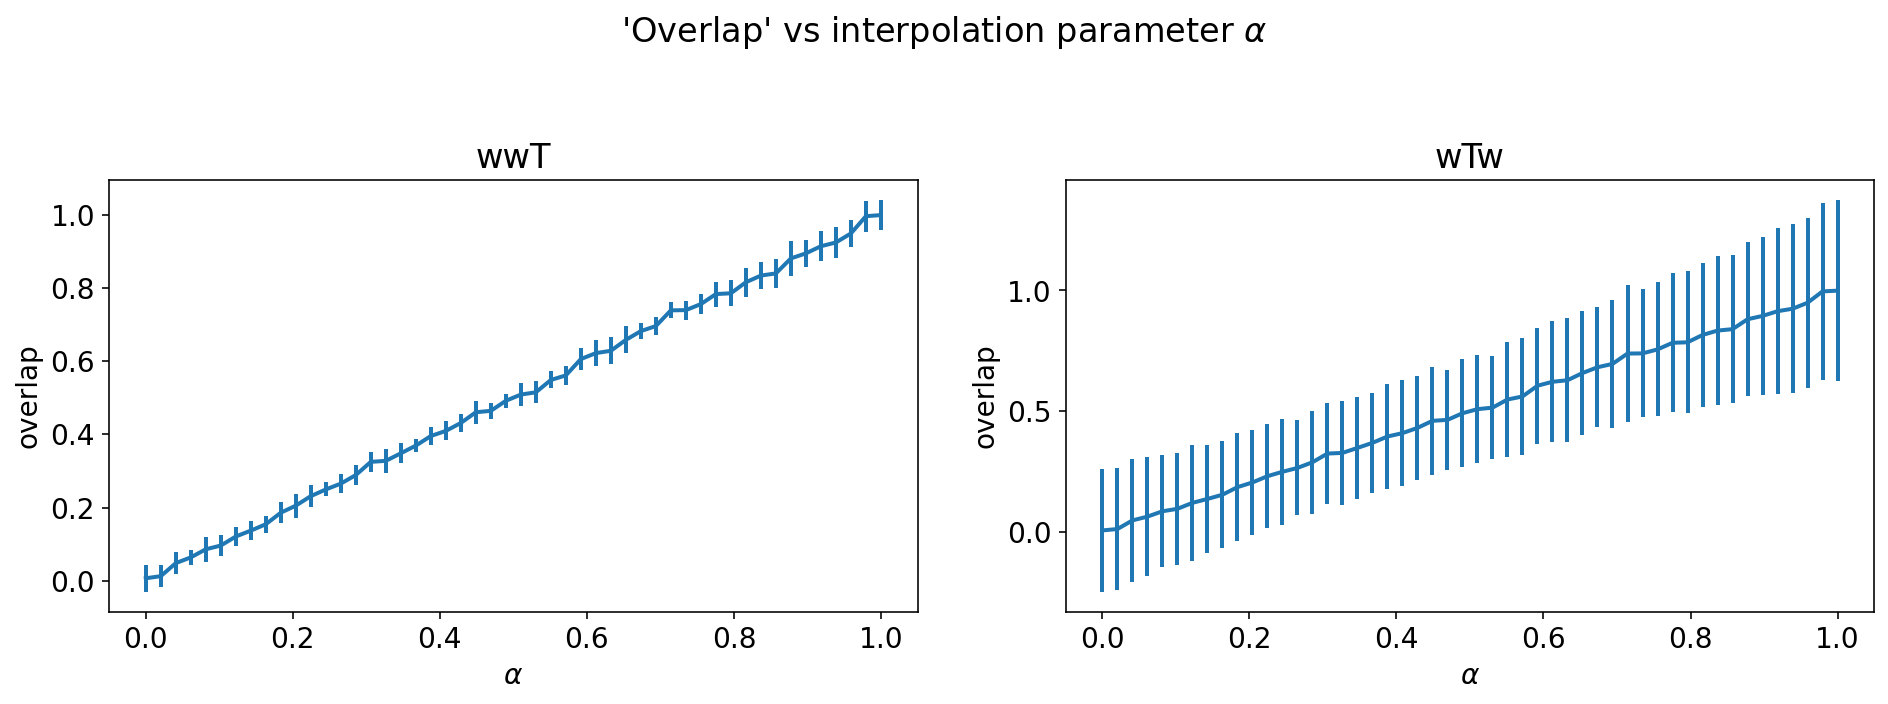

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(4/3 * 2 * 5, 5))

plt.suptitle(r"'Overlap' vs interpolation parameter $\alpha$")
for idx, key in enumerate(["wwT", "wTw"]):
    ax[idx].set_title(key)
    ax[idx].errorbar(alphas, means[key], yerr=stds[key], label=key)
    ax[idx].set_xlabel(r"$\alpha$")
    ax[idx].set_ylabel("overlap")
plt.tight_layout(rect=[0,0,1,.95])
plt.show()

Note that orthonormalising the weights of the first teacher (interpreted as vectors in K dimensions) increases the fluctuations in $W^\top W$, but these fluctuations are in any case much larger than those in $WW^\top$.